# 6.2 Calculating new variables

- 1. Importing Libraries and Data
- 2. Data Checking & Consistency
    - 2a. Drop columns not for comparisons
    - 2b. Adding new variables & calculations 

## 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
#Define path

path = r'C:\Users\Caroline\Documents\Career Foundry\06 2023 EVCS washington state'

In [3]:
# Import data

df_station = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'EVCS.pkl'))

In [4]:
df_ev_data = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'EV list.pkl'))

In [5]:
df_ev_hist = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'EV sales hist.pkl'))

In [6]:
df_pop = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'County pop.pkl'))

In [7]:
df_city = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'WA cities.pkl'))

In [8]:
df_popdensity = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'ruca2010revised.csv'))

In [9]:
#check shape of imported data
df_ev_data.shape

(134726, 11)

In [10]:
#check shape of imported data
df_station.shape

(1900, 22)

In [11]:
df_station.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1900 entries, 0 to 1899
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   1900 non-null   object        
 1   Station Name         1900 non-null   object        
 2   City                 1900 non-null   object        
 3   County               1900 non-null   object        
 4   Latitude             1900 non-null   float64       
 5   Longitude            1900 non-null   float64       
 6   EV Level1            1900 non-null   int8          
 7   EV Level2            1900 non-null   int8          
 8   EV Level3            1900 non-null   int8          
 9   Open Date            1900 non-null   object        
 10  EV Network           1900 non-null   object        
 11  Restricted Access    267 non-null    object        
 12  EV Pricing           542 non-null    object        
 13  EV Connector Types   1900 non-nul

In [12]:
#check shape of imported data
df_ev_hist.shape

(6006, 9)

In [13]:
#check shape of imported data
df_city.shape

(281, 5)

In [14]:
#check shape of imported data
df_pop.shape

(39, 7)

In [15]:
#check shape of imported data
df_popdensity.shape

(1458, 8)

## 2. Data Checking and Consistency

In [16]:
# checking df_popdensity
df_popdensity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   FIPS Code    1458 non-null   int64  
 1   State        1458 non-null   object 
 2   do_not_use   1458 non-null   object 
 3   County       1458 non-null   object 
 4   RUCA code    1458 non-null   int64  
 5   Tract Pop    1458 non-null   int64  
 6   Area sq mi   1458 non-null   float64
 7   Pop Density  1446 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 91.2+ KB


In [17]:
# Group by 'County' and calculate sum of columns Tract Pop and Area
df_grouped = df_popdensity.groupby('County').agg({'Tract Pop': 'sum', 'Area sq mi': 'sum'}).reset_index()

In [18]:
#Rename 'Tract Pop' for clarity
df_popdensity2 = df_grouped.rename(columns={'Tract Pop': 'CtyPop2010'})

In [19]:
#Check the 2010 County population from the RUCA dataset against the 2010 County population from the population dataset
compare2010pop = df_pop['CountyPop_10'] - df_popdensity2['CtyPop2010']

In [20]:
compare2010pop

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
dtype: int64

### 2a. Dropping columns

In [21]:
#Drop columns not necessary 
df_station = df_station.drop(columns = ['ID', 'Open Date', 'EV Network', 'Restricted Access', 'EV Pricing', 'EV Connector Types', 'EV_Connect NEMA515', 'EV_Connect NEMA520', 'EV_Connect NEMA1450', 'EV_Connect CCS', 'EV_Connect CHADEMO', 'EV_Connect TESLA', 'EV_Connect J1772' ])

In [22]:
# checking df_station
df_station.head()

,Station Name,City,County,Latitude,Longitude,EV Level1,EV Level2,EV Level3,Open Date2
0,"Aberdeen, WA - Tesla Supercharger",Aberdeen,Grays Harbor,46.976679,-123.813485,0,0,8,2017-01-15
1,"Walmart 2037 (Aberdeen, WA)",Aberdeen,Grays Harbor,46.976420,-123.807080,0,0,4,2021-07-03
2,415 West Heron Street (US-3HE-7VZ-1A),Aberdeen,Grays Harbor,46.970800,-123.821380,0,0,1,2023-01-16
3,415 West Heron Street (US-3HE-7VZ-1B),Aberdeen,Grays Harbor,46.971140,-123.820991,0,0,1,2023-01-16
4,415 West Heron Street (US-3HE-7VZ-2A),Aberdeen,Grays Harbor,46.971140,-123.820990,0,0,1,2023-01-16


In [23]:
#Drop columns not necessary for numerical comparisons
df_ev_data = df_ev_data.drop(columns = ['City', 'Model', 'Model Year', 'Make', 'CAFV Eligibility', 'Electric Range', 'Longitude', 'Latitude'])

In [24]:
# check the dataframe
df_ev_data.head()

,Index,County,Electric Vehicle Type
0,0,Thurston,BEV
1,1,Island,BEV
2,2,Snohomish,BEV
3,3,King,BEV
4,4,Snohomish,BEV


In [25]:
df_ev_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134726 entries, 0 to 134725
Data columns (total 3 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Index                  134726 non-null  object
 1   County                 134726 non-null  object
 2   Electric Vehicle Type  134726 non-null  object
dtypes: object(3)
memory usage: 4.1+ MB


In [26]:
#Group df_ev_hist by Date and County for total EV registered each month
df_ev_total_hist = df_ev_hist.groupby(['Date', 'County']).sum().reset_index() 

In [27]:
#Drop column Percent EV
df_ev_total_hist = df_ev_total_hist.drop(columns = ['Percent EV'])

In [28]:
# check the dataframe
df_ev_total_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3003 entries, 0 to 3002
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            3003 non-null   object
 1   County          3003 non-null   object
 2   BEV Registered  3003 non-null   int64 
 3   PHEV Registerd  3003 non-null   int64 
 4   EV Total        3003 non-null   int64 
 5   Non-EV Total    3003 non-null   int64 
 6   Total Vehicles  3003 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 164.4+ KB


### 2b. Adding new variables & calculations

In [29]:
# Merge df_popdensity and df_pop. Indicator = true to check if data is present in both dataframes 
df_pop = df_pop.merge(df_popdensity2, on = 'County', how='right', indicator = True)

In [30]:
# Check value count for '_merge' column
df_pop['_merge'].value_counts()

both          39
left_only      0
right_only     0
Name: _merge, dtype: int64

In [31]:
#Calculate the population density of WA counties in people per square miles with Census 2020 data
df_pop['popdensity'] = df_pop['CountyPop_20'] / df_pop['Area sq mi']

In [32]:
#Drop column '_merge', 'County_Rural_Urban_Code', and 'CtyPop2010' 
df_pop = df_pop.drop(columns = ['_merge', 'County_Rural_Urban_Code', 'CtyPop2010'])

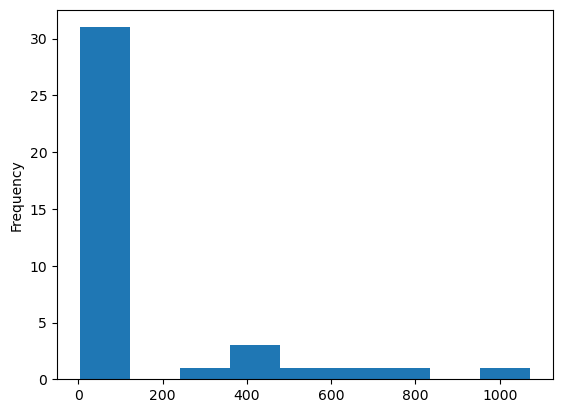

In [33]:
# histogram of Population density 
hist_density = df_pop['popdensity'].plot.hist(bins = 9)

In [34]:
#Create a flag based on the population density to determine if a county is high-density () / medium-density ()
# or low-density ()

df_pop.loc[df_pop['popdensity'] > 500, 'density flag'] = 'high density'

df_pop.loc[df_pop['popdensity'] < 100 , 'density flag'] = 'low density'

df_pop.loc[(df_pop['popdensity'] >= 100) & (df_pop['popdensity'] <= 500), 'density flag'] = 'medium density'

df_pop.loc[df_pop['County'] == 'Island', 'density flag'] = 'low density'

Island County, WA, has a area (sq mi) < 225, and the State of Washington classifies a rural county based on a population less than 100 persons per square mile OR a county smaller than 225 square miles. 'Low density' is being used in this case to estimate rural counties.

In [35]:
density_flags = df_pop.groupby('County')['density flag'].unique()


In [36]:
for county, flags in density_flags.items():
    print(f"County: {county}")
    print(f"Density Flags: {flags}")
    print()

County: Adams
Density Flags: ['low density']

County: Asotin
Density Flags: ['low density']

County: Benton
Density Flags: ['medium density']

County: Chelan
Density Flags: ['low density']

County: Clallam
Density Flags: ['low density']

County: Clark
Density Flags: ['high density']

County: Columbia
Density Flags: ['low density']

County: Cowlitz
Density Flags: ['low density']

County: Douglas
Density Flags: ['low density']

County: Ferry
Density Flags: ['low density']

County: Franklin
Density Flags: ['low density']

County: Garfield
Density Flags: ['low density']

County: Grant
Density Flags: ['low density']

County: Grays Harbor
Density Flags: ['low density']

County: Island
Density Flags: ['low density']

County: Jefferson
Density Flags: ['low density']

County: King
Density Flags: ['high density']

County: Kitsap
Density Flags: ['high density']

County: Kittitas
Density Flags: ['low density']

County: Klickitat
Density Flags: ['low density']

County: Lewis
Density Flags: ['low de

- County population changes

In [37]:
# population change calculations

df_pop['00-20 popchange'] = df_pop['CountyPop_20'] - df_pop['CountyPop_00']
df_pop['20-22 popchange'] = df_pop['CountyPop_22'] - df_pop['CountyPop_20']

- EV Charging Stations plus county information & population density

In [38]:
# Number of EVCS by County

df_station['evcs_sum'] = df_station.groupby('County')['Station Name'].transform('count')

In [39]:
# Number of Level 3 chargers by county
df_station['L3cs_sum_county'] = df_station.groupby('County')['EV Level3'].transform('sum')

In [40]:
#Add a column with boolean value for the presence of a Level3 port at the charging station
df_station['L3port present'] = df_station['EV Level3'] != 0

In [41]:
# Merge df_station and df_pop. Indicator = true to check if data is present in both dataframes 
df_station = df_station.merge(df_pop, on = 'County', how='right', indicator = True)

In [42]:
# Check value count for '_merge' column
df_station['_merge'].value_counts()

both          1900
right_only       2
left_only        0
Name: _merge, dtype: int64

In [43]:
test = df_station[df_station['_merge'] == 'right_only']

In [44]:
test

,Station Name,City,County,Latitude,Longitude,EV Level1,EV Level2,EV Level3,Open Date2,evcs_sum,...,CountyPop_00,CountyPop_10,CountyPop_20,CountyPop_22,Area sq mi,popdensity,density flag,00-20 popchange,20-22 popchange,_merge
187,NaN,NaN,Ferry,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,7262,7551,7178,7448,2203.158664,3.258050,low density,-84,270,right_only
197,NaN,NaN,Garfield,NaN,NaN,NaN,NaN,NaN,NaT,NaN,...,2397,2266,2288,2363,710.686362,3.219423,low density,-109,75,right_only


In [45]:
#Drop column '_merge'
df_station = df_station.drop(columns = ['_merge'])

In [46]:
df_station.head()

,Station Name,City,County,Latitude,Longitude,EV Level1,EV Level2,EV Level3,Open Date2,evcs_sum,...,CountyPop_90,CountyPop_00,CountyPop_10,CountyPop_20,CountyPop_22,Area sq mi,popdensity,density flag,00-20 popchange,20-22 popchange
0,Best Western Plus Bronco Inn - Tesla Supercharger,Ritzville,Adams,47.116294,-118.368328,0.0,0.0,4.0,2014-06-15,3.0,...,13603,16426,18728,20612,20961,1924.977566,10.707657,low density,4186,349
1,Cow Creek Mercantile,Ritzville,Adams,47.119480,-118.362710,0.0,0.0,4.0,2019-08-22,3.0,...,13603,16426,18728,20612,20961,1924.977566,10.707657,low density,4186,349
2,Conoco,Ritzville,Adams,47.118605,-118.365561,0.0,0.0,1.0,2018-03-07,3.0,...,13603,16426,18728,20612,20961,1924.977566,10.707657,low density,4186,349
3,Port of Clarkston,Clarkston,Asotin,46.425498,-117.048650,0.0,2.0,0.0,2017-05-01,1.0,...,17605,20553,21623,22288,22508,636.212991,35.032293,low density,1735,220
4,Hamilton Cellars - Tesla Destination,Benton City,Benton,46.296071,-119.451487,0.0,3.0,0.0,2015-07-14,20.0,...,112560,142473,175177,206875,212791,1700.379029,121.664050,medium density,64402,5916


In [47]:
df_station.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1902 entries, 0 to 1901
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Station Name     1900 non-null   object        
 1   City             1900 non-null   object        
 2   County           1902 non-null   object        
 3   Latitude         1900 non-null   float64       
 4   Longitude        1900 non-null   float64       
 5   EV Level1        1900 non-null   float64       
 6   EV Level2        1900 non-null   float64       
 7   EV Level3        1900 non-null   float64       
 8   Open Date2       1900 non-null   datetime64[ns]
 9   evcs_sum         1900 non-null   float64       
 10  L3cs_sum_county  1900 non-null   float64       
 11  L3port present   1900 non-null   object        
 12  CountyPop_90     1902 non-null   int64         
 13  CountyPop_00     1902 non-null   int64         
 14  CountyPop_10     1902 non-null   int64  

 - EV currently registered in WA

In [48]:
# Number of EV by County

df_ev_data['EV_co_curr'] = df_ev_data.groupby('County')['Index'].transform('count')

In [49]:
df_ev_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134726 entries, 0 to 134725
Data columns (total 4 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   Index                  134726 non-null  object
 1   County                 134726 non-null  object
 2   Electric Vehicle Type  134726 non-null  object
 3   EV_co_curr             134726 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 5.1+ MB


In [50]:
# Subset the EV data frame to extract the EV per county,

df_ev_sub = df_ev_data[['County', 'EV_co_curr']]

In [51]:
#drop duplicates from df_ev_sub 
df_ev_sub = df_ev_sub.drop_duplicates(subset='County', keep='first')

In [52]:
# Merge the df_ev_sub with 'df_station' based on 'County'
df_station = df_station.merge(df_ev_sub, on=['County'], how='left', indicator = True)

In [53]:
df_station.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1902 entries, 0 to 1901
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Station Name     1900 non-null   object        
 1   City             1900 non-null   object        
 2   County           1902 non-null   object        
 3   Latitude         1900 non-null   float64       
 4   Longitude        1900 non-null   float64       
 5   EV Level1        1900 non-null   float64       
 6   EV Level2        1900 non-null   float64       
 7   EV Level3        1900 non-null   float64       
 8   Open Date2       1900 non-null   datetime64[ns]
 9   evcs_sum         1900 non-null   float64       
 10  L3cs_sum_county  1900 non-null   float64       
 11  L3port present   1900 non-null   object        
 12  CountyPop_90     1902 non-null   int64         
 13  CountyPop_00     1902 non-null   int64         
 14  CountyPop_10     1902 non-null   int64  

In [54]:
# Check value count for '_merge' column
df_station['_merge'].value_counts()

both          1902
left_only        0
right_only       0
Name: _merge, dtype: int64

In [55]:
#Drop column '_merge'
df_station = df_station.drop(columns = ['_merge'])

 - EV ownership by county since 2017

In [56]:
df_ev_total_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3003 entries, 0 to 3002
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            3003 non-null   object
 1   County          3003 non-null   object
 2   BEV Registered  3003 non-null   int64 
 3   PHEV Registerd  3003 non-null   int64 
 4   EV Total        3003 non-null   int64 
 5   Non-EV Total    3003 non-null   int64 
 6   Total Vehicles  3003 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 164.4+ KB


In [57]:
# Calculate the percentage of EV registered that are BEV
df_ev_total_hist['BEV %'] = np.divide(df_ev_total_hist['BEV Registered'], df_ev_total_hist['EV Total']) * 100

In [58]:
# Fill any rows where the equation resulted in NaN with 0
df_ev_total_hist['BEV %'] = df_ev_total_hist['BEV %'].fillna(0)

In [59]:
# Calculate the overall percentage of EVs out of the total number of vehicles
df_ev_total_hist['Overall EV %'] = (df_ev_total_hist['EV Total'] / df_ev_total_hist['Total Vehicles']) * 100

In [60]:
# Convert 'Date' column to timestamp
df_ev_total_hist['Date'] = pd.to_datetime(df_ev_total_hist['Date'])

In [61]:
# Extract year and month from 'Date' column and create new columns 'Year' and 'Month'
df_ev_total_hist['Year'] = df_ev_total_hist['Date'].dt.year
df_ev_total_hist['Month'] = df_ev_total_hist['Date'].dt.month

In [62]:
max_open_date = df_ev_total_hist['Date'].max()
min_open_date = df_ev_total_hist['Date'].min()

print("Maximum Open Date:", max_open_date)
print("Minimum Open Date:", min_open_date)


Maximum Open Date: 2023-05-31 00:00:00
Minimum Open Date: 2017-01-31 00:00:00


In [63]:
# Extract year and month from 'Open Date2' column and create new columns 'Year' and 'Month'
df_station['Year'] = df_station['Open Date2'].dt.year
df_station['Month'] = df_station['Open Date2'].dt.month

In [64]:
max_open_date = df_station['Open Date2'].max()
min_open_date = df_station['Open Date2'].min()

print("Maximum Open Date:", max_open_date)
print("Minimum Open Date:", min_open_date)


Maximum Open Date: 2023-06-24 00:00:00
Minimum Open Date: 2008-02-15 00:00:00


In [65]:
# Count the number of stations open each month of the year
station_counts = df_station.groupby(['County', 'Year', 'Month']).size().reset_index(name='Station Count')

In [66]:
# Merge the station counts with 'df_ev_total_hist' based on 'County', 'Year', and 'Month'
merged_df = df_ev_total_hist.merge(station_counts, on=['County', 'Year', 'Month'], how='outer', indicator = True)

In [67]:
# Check value count for '_merge' column
merged_df['_merge'].value_counts()

left_only     2533
both           470
right_only     200
Name: _merge, dtype: int64

In [68]:
# Change the NaNs in Station count to 0 
merged_df['Station Count'] = merged_df['Station Count'].fillna(0)

In [69]:
# Month and years are floats - convert to integers
merged_df['Month'] = merged_df['Month'].astype(int)
merged_df['Year'] = merged_df['Year'].astype(int)

In [70]:
merged_df['Month'] = merged_df['Month'].astype(str)
merged_df['Year'] = merged_df['Year'].astype(str)

In [72]:
# Convert 'Year' and 'Month' columns to datetime format for sorting
merged_df['Date'] = pd.to_datetime(merged_df['Year'] + '-' + merged_df['Month'], format='%Y-%m')

# Display the first few rows of the merged dataframe
print(merged_df.head())


        Date   County  BEV Registered  PHEV Registerd  EV Total  Non-EV Total  \
0 2017-01-01    Adams             1.0             1.0       2.0       17252.0   
1 2017-01-01   Asotin             4.0             3.0       7.0       18806.0   
2 2017-01-01   Benton           129.0           129.0     258.0      167678.0   
3 2017-01-01   Chelan            54.0            28.0      82.0       73161.0   
4 2017-01-01  Clallam            73.0            64.0     137.0       69053.0   

   Total Vehicles      BEV %  Overall EV %  Year Month  Station Count  \
0         17254.0  50.000000      0.011592  2017     1            0.0   
1         18813.0  57.142857      0.037208  2017     1            0.0   
2        167936.0  50.000000      0.153630  2017     1            0.0   
3         73243.0  65.853659      0.111956  2017     1            0.0   
4         69190.0  53.284672      0.198005  2017     1            0.0   

      _merge  
0  left_only  
1  left_only  
2  left_only  
3  left_only  

In [74]:
# Sorting merged_df by County and Date, in ascending order 
merged_df = merged_df.sort_values(by=['County', 'Date'], ascending=True)

In [75]:
#Reset the index
merged_df = merged_df.reset_index(drop=True)

In [76]:
# Calculate the cumulative station count within each county
merged_df['Cum_CS_count'] = merged_df.groupby('County')['Station Count'].cumsum()

In [77]:
#Drop column '_merge'
merged_df = merged_df.drop(columns = ['_merge'])

In [78]:
# Create a variable that totals up the opening of EVCS all across WA
merged_df['Cumulative EVCS WA'] = merged_df.groupby(['Year', 'Month'])['Cum_CS_count'].transform('sum')

In [82]:
merged_df.head()

,Date,County,BEV Registered,PHEV Registerd,EV Total,Non-EV Total,Total Vehicles,BEV %,Overall EV %,Year,Month,Station Count,Cum_CS_count,Cumulative EVCS WA
0,2014-06-01,Adams,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,6,1.0,1.0,9.0
1,2017-01-01,Adams,1.0,1.0,2.0,17252.0,17254.0,50.000000,0.011592,2017,1,0.0,1.0,309.0
2,2017-02-01,Adams,2.0,2.0,4.0,17197.0,17201.0,50.000000,0.023254,2017,2,0.0,1.0,316.0
3,2017-03-01,Adams,2.0,4.0,6.0,17177.0,17183.0,33.333333,0.034918,2017,3,0.0,1.0,322.0
4,2017-04-01,Adams,2.0,3.0,5.0,17200.0,17205.0,40.000000,0.029061,2017,4,0.0,1.0,331.0


In [79]:
# Create a function- calculate_estimated_population - to estimate the population by month of each county. 

def calculate_estimated_population(county, year, month):
    if year == 2010 and month == 6:
        return df_pop.loc[county, 'CountyPop_10']
    elif year == 2020 and month == 6:
        return df_pop.loc[county, 'CountyPop_20']
    else:
        pop_10 = df_pop.loc[county, 'CountyPop_10']
        pop_20 = df_pop.loc[county, 'CountyPop_20']
        change_rate = (pop_20 - pop_10) / 10  # Average annual change rate
        months_since_2020 = (year - 2020) * 12 + (month - 6)
        estimated_pop = round(pop_20 + (change_rate / 12) * months_since_2020)
        return estimated_pop


In [80]:
# set the index of df_pop to County column for the function to work
df_pop = df_pop.set_index('County')

In [83]:
# Convert 'Year' and 'Month' columns to integer type
merged_df['Year'] = merged_df['Year'].astype(int)
merged_df['Month'] = merged_df['Month'].astype(int)

# Apply the calculate_estimated_population function to create Estimated Population variable
merged_df['Estimated Population'] = merged_df.apply(lambda row: calculate_estimated_population(row['County'], row['Year'], row['Month']), axis=1)


In [84]:
# Calculate EVs per person
merged_df['EVs per person'] = merged_df['EV Total'] / merged_df['Estimated Population']

In [85]:
# Calculate Total Vehicles per person
merged_df['Total Vehicles per person'] = merged_df['Total Vehicles'] / merged_df['Estimated Population']

In [86]:
#checking the merged_df
merged_df.tail()

,Date,County,BEV Registered,PHEV Registerd,EV Total,Non-EV Total,Total Vehicles,BEV %,Overall EV %,Year,Month,Station Count,Cum_CS_count,Cumulative EVCS WA,Estimated Population,EVs per person,Total Vehicles per person
3198,2023-02-01,Yakima,450.0,239.0,689.0,226514.0,227203.0,65.312046,0.303253,2023,2,0.0,20.0,1759.0,260316,0.002647,0.872797
3199,2023-03-01,Yakima,460.0,237.0,697.0,225292.0,225989.0,65.997131,0.308422,2023,3,1.0,21.0,1783.0,260428,0.002676,0.867760
3200,2023-04-01,Yakima,471.0,241.0,712.0,223673.0,224385.0,66.151685,0.317312,2023,4,3.0,24.0,1823.0,260541,0.002733,0.861227
3201,2023-05-01,Yakima,484.0,246.0,730.0,220494.0,221224.0,66.301370,0.329982,2023,5,6.0,30.0,1870.0,260653,0.002801,0.848730
3202,2023-06-01,Yakima,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023,6,1.0,31.0,1480.0,260765,NaN,NaN


In [87]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       3203 non-null   datetime64[ns]
 1   County                     3203 non-null   object        
 2   BEV Registered             3003 non-null   float64       
 3   PHEV Registerd             3003 non-null   float64       
 4   EV Total                   3003 non-null   float64       
 5   Non-EV Total               3003 non-null   float64       
 6   Total Vehicles             3003 non-null   float64       
 7   BEV %                      3003 non-null   float64       
 8   Overall EV %               3003 non-null   float64       
 9   Year                       3203 non-null   int32         
 10  Month                      3203 non-null   int32         
 11  Station Count              3203 non-null   float64       
 12  Cum_CS

In [90]:
columns_to_convert = ['BEV Registered', 'PHEV Registerd', 'Cumulative EVCS WA', 'Cum_CS_count', 'Station Count', 'EV Total', 'Non-EV Total', 'Total Vehicles']

# Replace NaN values with 0
merged_df[columns_to_convert] = merged_df[columns_to_convert].fillna(0)

# Convert the columns to integer data type
merged_df[columns_to_convert] = merged_df[columns_to_convert].astype(int)


In [91]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       3203 non-null   datetime64[ns]
 1   County                     3203 non-null   object        
 2   BEV Registered             3203 non-null   int32         
 3   PHEV Registerd             3203 non-null   int32         
 4   EV Total                   3203 non-null   int32         
 5   Non-EV Total               3203 non-null   int32         
 6   Total Vehicles             3203 non-null   int32         
 7   BEV %                      3003 non-null   float64       
 8   Overall EV %               3003 non-null   float64       
 9   Year                       3203 non-null   int32         
 10  Month                      3203 non-null   int32         
 11  Station Count              3203 non-null   int32         
 12  Cum_CS

In [88]:
df_station.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1902 entries, 0 to 1901
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Station Name     1900 non-null   object        
 1   City             1900 non-null   object        
 2   County           1902 non-null   object        
 3   Latitude         1900 non-null   float64       
 4   Longitude        1900 non-null   float64       
 5   EV Level1        1900 non-null   float64       
 6   EV Level2        1900 non-null   float64       
 7   EV Level3        1900 non-null   float64       
 8   Open Date2       1900 non-null   datetime64[ns]
 9   evcs_sum         1900 non-null   float64       
 10  L3cs_sum_county  1900 non-null   float64       
 11  L3port present   1900 non-null   object        
 12  CountyPop_90     1902 non-null   int64         
 13  CountyPop_00     1902 non-null   int64         
 14  CountyPop_10     1902 non-null   int64  

In [95]:
columns_to_convert2 = ['evcs_sum', 'Year', 'Month', 'EV Level1', 'EV Level2', 'EV Level3']

# Replace NaN values with 0
df_station[columns_to_convert2] = df_station[columns_to_convert2].fillna(0)

# Convert the columns to integer data type
df_station[columns_to_convert2] = df_station[columns_to_convert2].astype(int)

# Export Data

In [98]:
#Export df_station in .pkl format
df_station.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'WA_present.pkl'))

In [99]:
#Export merged_df in .pkl format
merged_df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'WA_hist.pkl'))

In [100]:
#Export df_pop in .pkl format
df_pop.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'County_pop_calc.pkl'))